In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [ ]:
df=pd.read_csv('/content/sales_data_with_discounts.csv')
df.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


Numerical Columns:

In [ ]:
num_col = []

for i in df.columns:
    if df[i].dtypes != 'object':
        num_col.append(i)

In [ ]:
num_col

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

Mean:

In [ ]:
for i in num_col:
    print(f'mean of {i} column = ', df[i].mean())

mean of Volume column =  5.066666666666666
mean of Avg Price column =  10453.433333333332
mean of Total Sales Value column =  33812.83555555555
mean of Discount Rate (%) column =  15.155241895330914
mean of Discount Amount column =  3346.499424342415
mean of Net Sales Value column =  30466.336131270138


Median:

In [ ]:
for i in num_col:
    print(f'median of {i} column = ', df[i].median())

median of Volume column =  4.0
median of Avg Price column =  1450.0
median of Total Sales Value column =  5700.0
median of Discount Rate (%) column =  16.57776564929597
median of Discount Amount column =  988.9337332382784
median of Net Sales Value column =  4677.788059301853


Mode:

In [ ]:
for i in num_col:
    print(f'mode of {i} column = ', df[i].mode()[0])

mode of Volume column =  3
mode of Avg Price column =  400
mode of Total Sales Value column =  24300
mode of Discount Rate (%) column =  5.007822189204133
mode of Discount Amount column =  69.17794228822787
mode of Net Sales Value column =  326.97480055470817


Standard Deviation:

In [ ]:
for i in num_col:
    print(f'standard deviation of {i} column = ', df[i].std())

standard deviation of Volume column =  4.231602391213926
standard deviation of Avg Price column =  18079.90483993645
standard deviation of Total Sales Value column =  50535.07417255328
standard deviation of Discount Rate (%) column =  4.220602153325511
standard deviation of Discount Amount column =  4509.9029633539985
standard deviation of Net Sales Value column =  46358.656624066934


1. I calculate mean to find out the avg. of seperate of the values of the numerical columns.
2. I calculate median to get actual middile values.
3. I calculate  mode to find out the most frequent value in a dataset.
4.I calculate standard deviation to spread out the data points are around the mean.

Histograms

In [ ]:
num_col

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [ ]:
# j=1
# for i in num_col:
#     plt.subplot(3,2,j)
#     plt.hist(df[i])
#     plt.show()
#     j+=1
## another method to find the histogram using for loop.

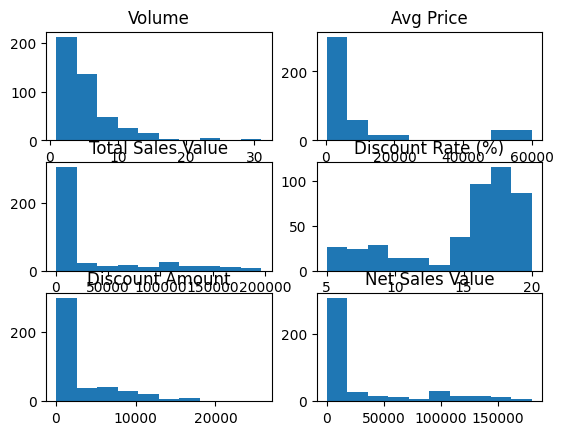

In [ ]:
plt.subplot(3,2,1)
plt.hist(df['Volume'])
plt.title('Volume')

plt.subplot(3,2,2)
plt.hist(df['Avg Price'])
plt.title('Avg Price')

plt.subplot(3,2,3)
plt.hist(df['Total Sales Value'])
plt.title('Total Sales Value')


plt.subplot(3,2,4)
plt.hist(df['Discount Rate (%)'])
plt.title('Discount Rate (%)')


plt.subplot(3,2,5)
plt.hist(df['Discount Amount'])
plt.title('Discount Amount')


plt.subplot(3,2,6)
plt.hist(df['Net Sales Value'])
plt.title('Net Sales Value')

plt.show()

OBSERVATION: In the 'volume' column histogram the skewness of the plot towards right also in the 'Avg price,Total sales Value,Discount aAmount & Net Sales Value'Column histogram skewness shows same towards right and only 'Discount Rate(%)'Column has the Skwness towards left

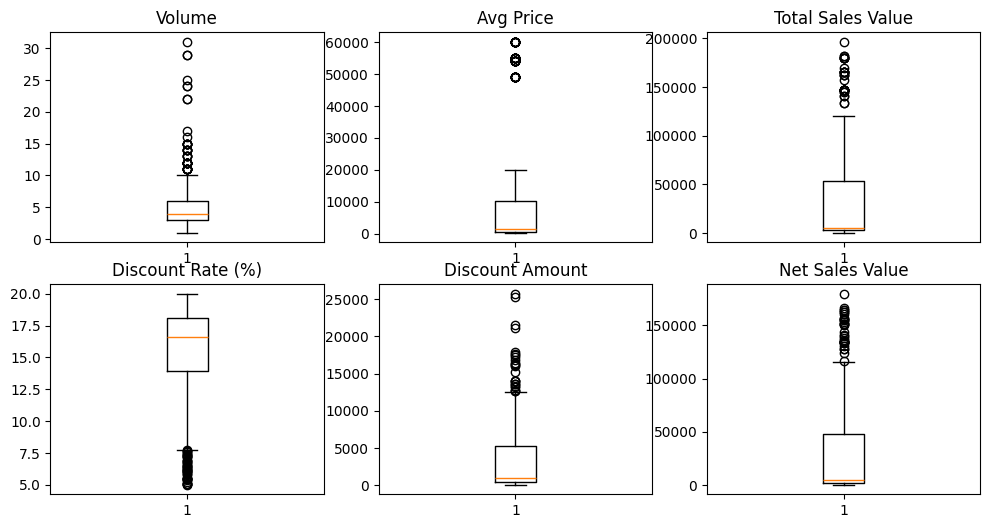

In [ ]:
j=1
plt.figure(figsize=(12,6))
for i in num_col:
    plt.subplot(2,3,j)
    plt.boxplot(df[i])
    plt.title(i)
    j+=1
plt.show()

OBSERVATION:
Box plot used for detecting outliers and from the above plotings we found that in 'Volume','Total Sales Value','Discount Rate(%)','Discount Amount','Net Sales Value' columns having more no.of outliers but in case of 'Avg Price' the outliers are less in number.

In [ ]:
cat_col = []

for i in df.columns:
    if df[i].dtypes =='object':
        cat_col.append(i)

In [ ]:
cat_col.remove('Date')

In [ ]:
cat_col

['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

<BarContainer object of 15 artists>

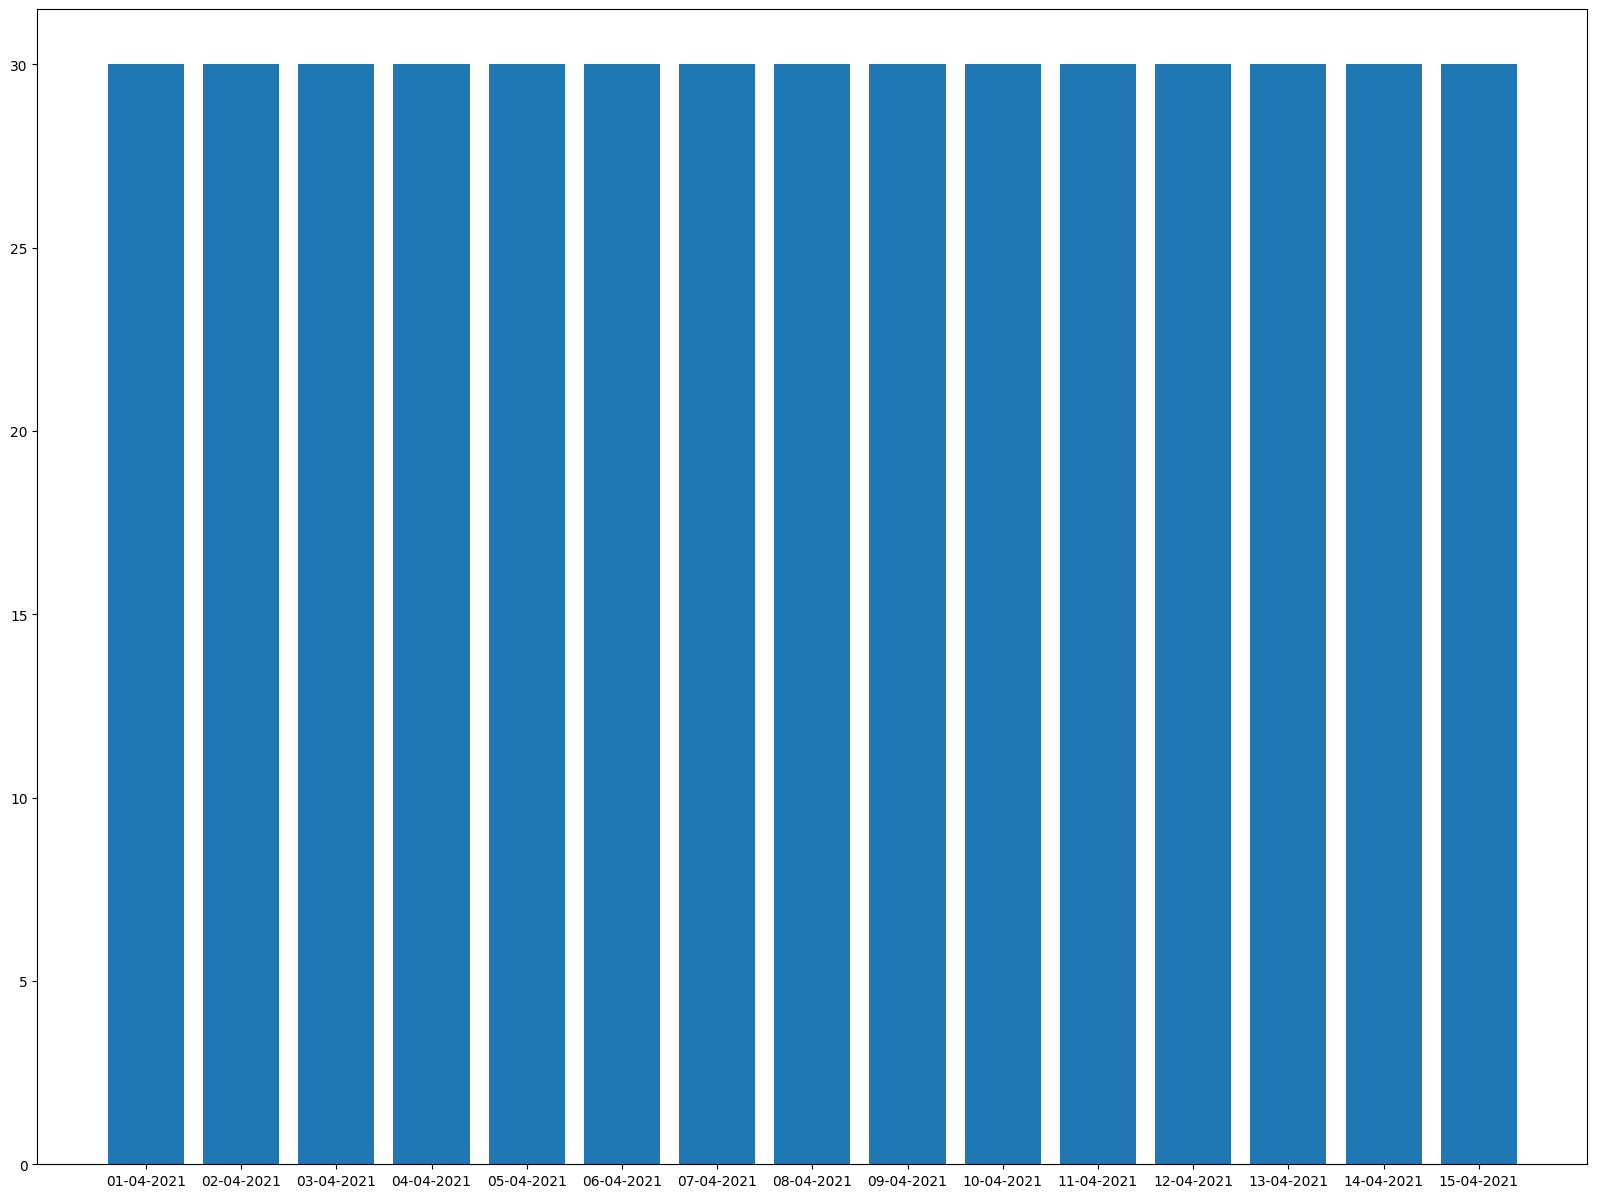

In [ ]:
plt.figure(figsize=(20,15))
plt.bar(df['Date'].unique(), df['Date'].value_counts())

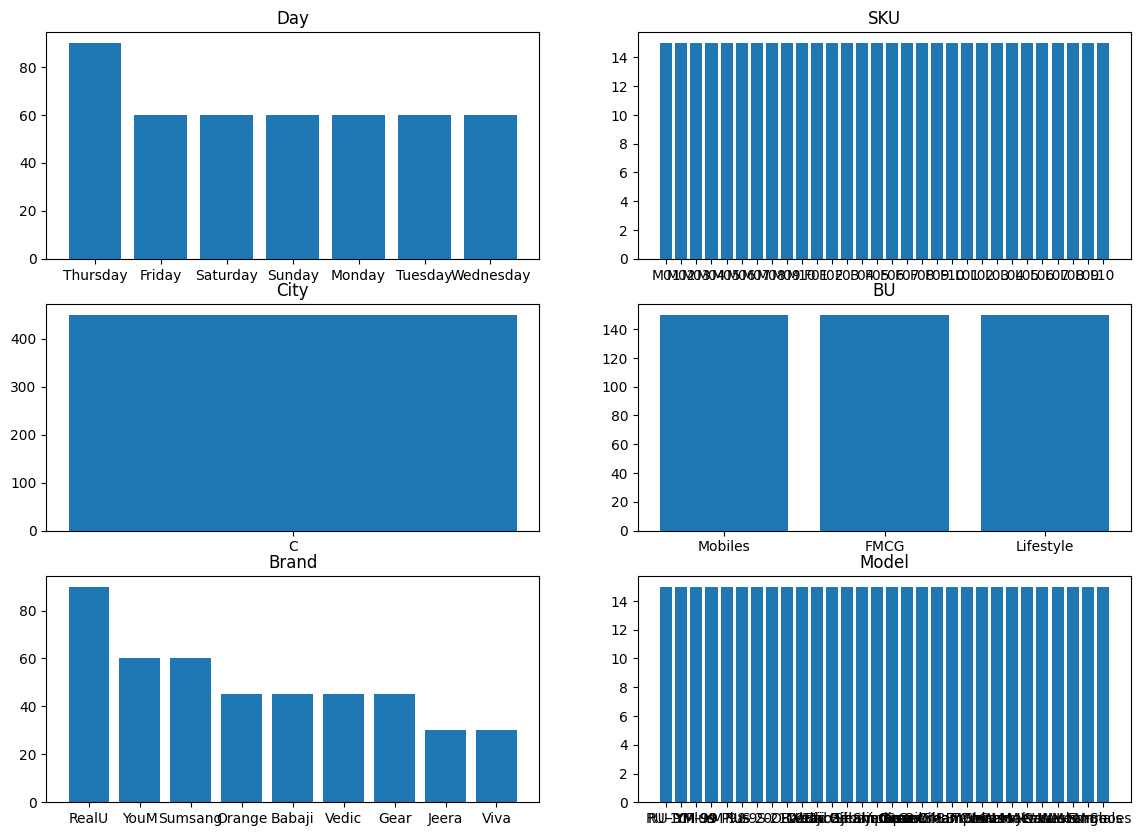

In [ ]:
j=1
plt.figure(figsize=(14,10))
for i in cat_col:
    plt.subplot(3,2,j)
    plt.bar(df[i].unique(), df[i].value_counts())
    plt.title(i)
    j+=1
plt.show()

OBSERVATION: In this bar diagram we conclude that the frequency of the columns('Date','SKU','City','BU','Model') are having full length of frequency but in case of "day" & "Brand" is not stable.

Standardization of Numerical Variables

In [ ]:
##Before standardization
df[num_col]

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
st = StandardScaler()

In [ ]:
df[num_col]=st.fit_transform(df[num_col])

In [ ]:
## After standardization
df[num_col]

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


OBSERVATION: We use standardisation concept to put the data set between 3to-3 range.

Conversion of Categorical Data into Dummy Variables.

In [ ]:
oh=OneHotEncoder()

In [ ]:
for i in cat_col:
    df[sorted(df[i].unique())] = oh.fit_transform(df[[i]]).toarray()

In [ ]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,...,Vedic Cream,Vedic Oil,Vedic Shampoo,W-Casuals,W-Inners,W-Lounge,W-Western,YM-98,YM-99,YM-99 Plus
0,01-04-2021,Thursday,M01,C,2.350029,Mobiles,RealU,RU-10,0.091173,2.925721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01-04-2021,Thursday,M02,C,1.167129,Mobiles,RealU,RU-9 Plus,-0.019570,1.330995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01-04-2021,Thursday,M03,C,0.457388,Mobiles,YouM,YM-99,0.312659,1.562775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,01-04-2021,Thursday,M04,C,0.220808,Mobiles,YouM,YM-99 Plus,0.534146,1.719276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,01-04-2021,Thursday,M05,C,-0.488932,Mobiles,YouM,YM-98,-0.130313,-0.188452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Conclusion :
By data analytics and visualization we found different patterns of data also for the futher predictive data.
To built the data in between the range of 3to-3 we use the standardisation method which will help us to further prediction and also we use one-hot encoding method to convert the data into binary format which will help to built the ML models.